In [16]:
import pandas as pd
import os
import datetime

## From the cleaned Flight Log compilation file

An excel combined file of all flight logs and ops has been created with additional metadata referring to the location, time, depth and quality of XBT and AXCTD data.

Location of dropsonde events

In [17]:
fl=pd.read_excel('/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBTQCandEvent_Log-all.xlsx',sheet_name='Spring')

### XBT and AXCTD Drop Locations

The map below has all drop locations plotted, with successful locations in black in the second plot

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean

def make_map(projection=ccrs.PlateCarree(),figsize=(16, 16)):
    fig, ax = plt.subplots(figsize=figsize,
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax, plt

Text(0.5,1,'Good Sonde Drops')

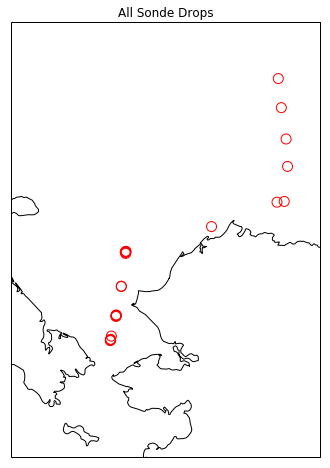

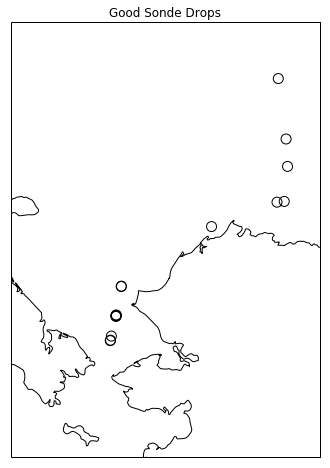

In [19]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

fig,ax,plt = make_map(projection=projection,figsize=(8,8))
extent = [-176, -150, 62.5, 77.5]

t = ax.scatter(fl['lon'], fl['lat'], s=100, facecolors='none', edgecolors='r', transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)
plt.title('All Sonde Drops')

fig,ax,plt = make_map(projection=projection,figsize=(8,8))
extent = [-176, -150, 62.5, 77.5]

t = ax.scatter(fl['lon'][fl['DataQuality'] == 'Good'], fl['lat'][fl['DataQuality'] == 'Good'],
               s=100, facecolors='none', edgecolors='k', transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)
plt.title('Good Sonde Drops')

### Each XBT Location is a geographic region of interest.

There are 5 distinct regions of interest (not counting the AXCTD line) from South to North.  Station 4 had no successful deployments and station 5 is Barrow Canyon with only a single deployment.

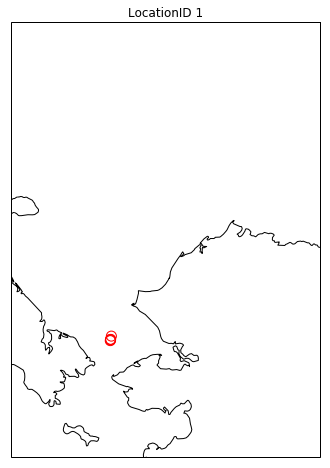

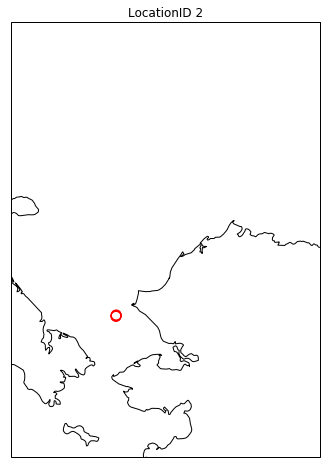

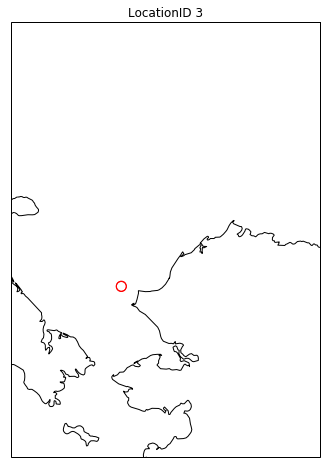

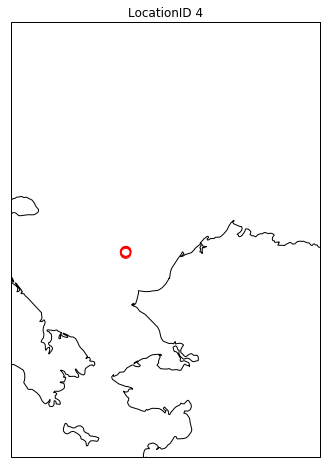

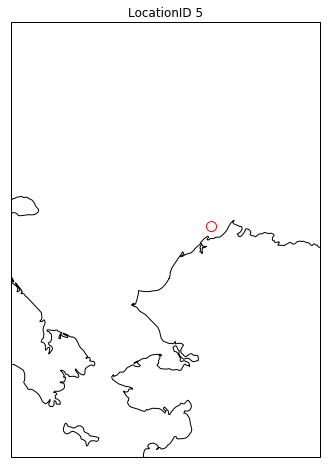

In [20]:
extent = [-176, -150, 62.5, 77.5]

for count in range(1,6):
    fig,ax,plt = make_map(projection=projection,figsize=(8,8))
    extent = [-176, -150, 62.5, 77.5]

    t = ax.scatter(fl['lon'][fl['LocationID'] == count], fl['lat'][fl['LocationID'] == count],
                   s=100, facecolors='none', color='r', transform=transformation)

    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)
    plt.title('LocationID {}'.format(count))

### Temperature Profiles for each Region of interest

In [21]:
source_dir = '/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/'

source_file = [os.path.join(dp, f) for dp, dn,
   fn in os.walk(os.path.expanduser(source_dir)) for f in fn if 'clean.dta' in f]


In [22]:
dfs = {}
for i,filename in enumerate(sorted(source_file)):
    try:
        header = pd.read_csv(filename,nrows=4,header=None)
        
        #parse date in header to add delta-t in columns to
        sd = header[0][1].split('= ')[-1].split('.')
        nofrag, frag = header[0][2].split('= ')[-1].split('.')
        st = datetime.datetime.strptime(sd[0] + ' ' + nofrag,'%Y/%m/%d %H:%M:%S')
        st = st.replace(microsecond=int(frag))
        
        columns = ['Time','Depth','Frequency','DegreeC','DegreeF']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='******')
        temp_data['DateTime'] = [st +datetime.timedelta(seconds=x[1]['Time']) for x in temp_data.iterrows()]
        temp_data = temp_data.set_index(pd.DatetimeIndex(temp_data['DateTime']))
        dfs.update({filename:temp_data})
        print(filename)
    except ValueError:
        print("{} failed to load".format(filename))
        continue
    except KeyError:
        columns = ['Frame#','Data','CRC','Depth','Temp','Cond','Salinity']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='*****')
        dfs.update({filename:temp_data})
        print(filename)    

/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00002.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00003.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00004.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00000.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00001.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00002.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00003.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00002.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00003.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00004.clean.dta


/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00004.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00000.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00002.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00003.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00001.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00002.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00003.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00003.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00002.clean.dta
/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00004.clean.dta


No handles with labels found to put in legend.


/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180529/log00009.clean.dta


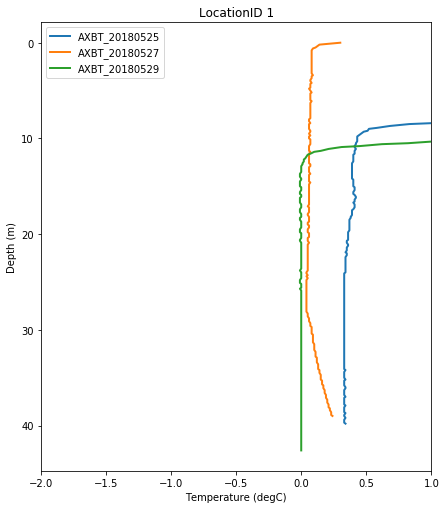

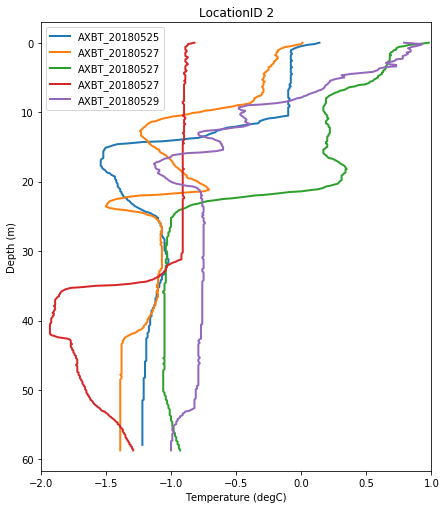

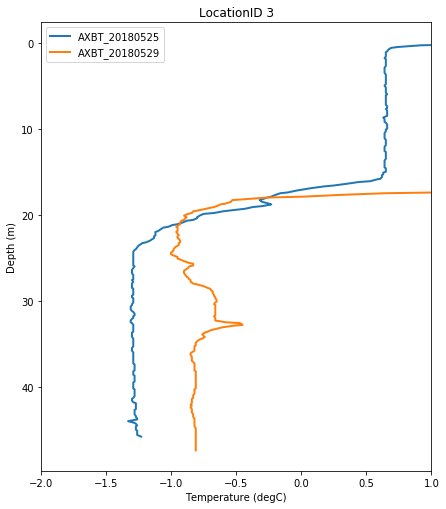

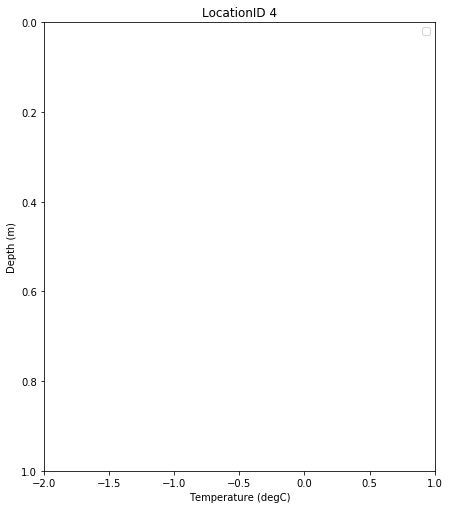

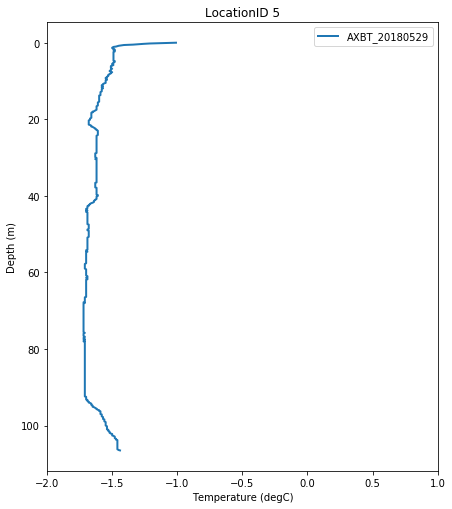

In [24]:
for count in range(1,6):
    fp = fl['Filename_clean'][fl['LocationID'] == count]
    fig, ax = plt.subplots(figsize=(7,8.25))
    for i,ds in enumerate(fp):
        try:
            dfp = '/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/'+ds
        except:
            continue
        df = dfs[dfp]
        print(dfp)
        try:
            ax.plot(df['(C)'],df['Depth'],label=ds.split('/')[-2],linewidth=2)

        except:
            pass

    ax.set_xlim([-2,1])
    plt.ylabel('Depth (m)')
    plt.xlabel('Temperature (degC)')    
    ax.invert_yaxis()
    plt.legend(loc='best')
    plt.title("LocationID {}".format(count))
    fig.savefig("LocationID_{}".format(count)+".png",dpi=300, bbox_inches='tight')